# Model Ensembles
---

- We explore **Model Ensembles**, which is a composite Machine Learning model, which allows us to produce better predictions than that of an individual model
- We can build up a simple motivation from Decision Trees and move onto concepts within **Parallel Model Ensembles** such as **Random Forests**, and *Series Model Ensembles*, such as **Gradient Boosting**, the theoretical concepts, underpinning each composite model, and how to apply them

In [ ]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

---
### Medical Insurance: Decision Tree Regression:
- To motivate Decision Trees, we use the `insurance_v2.csv` dataset. It is similar to the `insurance_v1.csv` dataset, however instead of columns `height` and `weight`, the data contains a column `BMI`. Furthermore, since this is just a simple motivation, we will just use the existing columns and NOT feature engineer any new columns
- Decision Trees require **no numerical data pre-processing** and **minimal categorical preprocessing** - the only columns you may want to encode are `sex`, `smoker` and `region`, through means of **Ordinal Encoding**
- After picking a relevant feature set, we can train a `DecisionTreeRegressor` on the set of features
- Optimise the model performance by Hyperparameter Tuning with **Grid Search CV**
- Retrieve the optimal values for the hyperparameters - e.g. `max_depth` and `min_samples_leaf`
- Comparison to simpler models?

In [2]:
# Load the dataset:

filepath = r'./Data/insurance_v2.csv'
df = pd.read_csv(filepath)
df.columns = ['Age', 'Sex', 'BMI', 'Children', 'Smoker?', 'Region', 'Hospital Charges']
df.head()

,Age,Sex,BMI,Children,Smoker?,Region,Hospital Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Ordinal Encoding Step:

df['Smoker?'] = df['Smoker?'].map({'yes':1, 'no':0})
df['Sex'] = df['Sex'].map({'female':1, 'male':0})

# Feature Selection Step:
    # We will use 4 features for this model:
    # 1) Age
    # 2) Sex
    # 3) Smoker?  -> Highest Predictive Power
    # 4) BMI      -> Serves as a Proxy for Obesity

X = df[['Age', 'Sex', 'Smoker?', 'BMI']]
y = df['Hospital Charges']

# Train-Test-Split Step:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# Initialise Decision Tree Regressor Model:

DesicionTreeModel = DecisionTreeRegressor()

We want to use a Decision Tree with optimal parameters (somewhat). To choose the optimal parameters, we need to tune them using a Hyperparater Algorithm, in this case, we use **GridSearchCV**

In [4]:
# Perform Grid Search CV
# Pass Ranges for Hyperparameters
parameters = {'max_depth':        [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [5, 10, 20,30]}  

GridSearchOpt = GridSearchCV(estimator = DesicionTreeModel, param_grid = parameters, cv=5)

We can now fit these optimal parameters to the training dataset from before:

In [5]:
# Fit and Predict
GridSearchOpt.fit(X_train, y_train)
y_pred = GridSearchOpt.predict(X_test)

# Evaluate the DecisionTreeModel performance and print the evaluation metrics:
MAE_DecisionTree = mean_absolute_error(y_test, y_pred)
MSE_DecisionTree = mean_squared_error(y_test, y_pred)
R2SCORE_DecisionTree = r2_score(y_test, y_pred)

print(f'MSE is {MSE_DecisionTree:.4f}')
print(f'RMSE is {MSE_DecisionTree**0.5:.4f}')
print(f'MAE is {MAE_DecisionTree:.4f}')
print(f'R-squared is {R2SCORE_DecisionTree:.4f}')


# Retrieve the optimal hyperparamer values, found by Grid Search CV
best_depth = GridSearchOpt.best_estimator_.max_depth
best_min_samples = GridSearchOpt.best_estimator_.min_samples_leaf
print(f'Best Estimator: Depth of: {best_depth}, and the Minimum Number of Samples: {best_min_samples}')

MSE is 14825725.5453
RMSE is 3850.4189
MAE is 2464.1324
R-squared is 0.9030
Best Estimator: Depth of: 4, and the Minimum Number of Samples: 20


---
### Medical Insurance - Visualising the Tree:
We can plot some visualisations, related to Decision Trees:
- We can build a `DecisionTreeRegressor()` model directly, each time passing a different `max_depth` value
- We can plot a **Scatterplot** of the True values vs Predicted values for the `Hospital Charges` in the test data, to see how the test data points are grouped in regions by the Decision Tree Regressor 

##### Decision Tree with `max_depth = 1`:

MSE is 49989773.6380
RMSE is 7070.3447
MAE is 5396.7606
R-squared is 0.6730


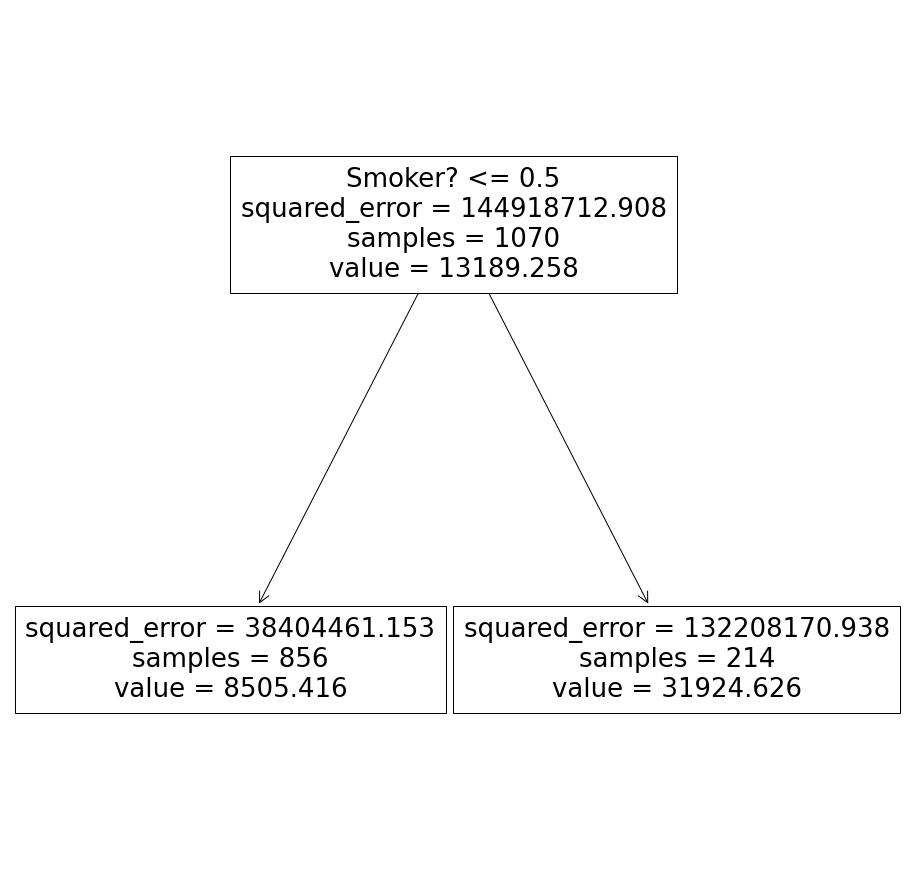

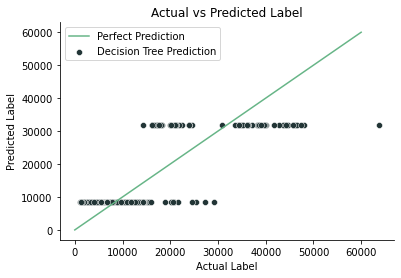

In [6]:
# Initialise Decision Tree Regressor Model

Model1_DT = DecisionTreeRegressor(max_depth = 1)

# 2) Fit and Predict
Model1_DT.fit(X_train, y_train)
y_pred = Model1_DT.predict(X_test)


# Evaluate the Model1_DT performance and print the results of the evaluation metrics:
MAE_Model1DT = mean_absolute_error(y_test, y_pred)
MSE_Model1DT = mean_squared_error(y_test, y_pred)
R2SCORE_Model1DT = r2_score(y_test, y_pred)

print(f'MSE is {MSE_Model1DT:.4f}')
print(f'RMSE is {MSE_Model1DT**0.5:.4f}')
print(f'MAE is {MAE_Model1DT:.4f}')
print(f'R-squared is {R2SCORE_Model1DT:.4f}')


# Plotting the Decision Tree
fig, ax = plt.subplots(figsize = (16,16))
plot_tree(Model1_DT, feature_names = Model1_DT.feature_names_in_)
plt.show()

# Ploting the True vs Predicted Labels

x = np.linspace(0,60000, 100)
y = x

fig, ax = plt.subplots()
g = sns.lineplot(x=x, y=y, label = 'Perfect Prediction', color = '#67B587')
g = sns.scatterplot(x = y_test.tolist(), y = y_pred.tolist(), ax = ax, label = 'Decision Tree Prediction', color = '#223536')
g.set_title('Actual vs Predicted Label')
g.set(xlabel = 'Actual Label', ylabel = 'Predicted Label')
sns.despine()
plt.show()

##### Decision Tree with `max_depth = n`:

Using the code from above, we can create a function to return similar plots for `max_depth = n`, where $n$ is the depth of the tree and can be toggled to see what difference it makes:

In [7]:
def DecisionTreePlot(n):  
   # Initialise Decision Tree Regressor Model

    Model1_DT = DecisionTreeRegressor(max_depth = n)

    # 2) Fit and Predict
    Model1_DT.fit(X_train, y_train)
    y_pred = Model1_DT.predict(X_test)


    # Evaluate the Model1_DT performance and print the results of the evaluation metrics:
    MAE_Model1DT = mean_absolute_error(y_test, y_pred)
    MSE_Model1DT = mean_squared_error(y_test, y_pred)
    R2SCORE_Model1DT = r2_score(y_test, y_pred)

    print(f'MSE is {MSE_Model1DT:.4f}')
    print(f'RMSE is {MSE_Model1DT**0.5:.4f}')
    print(f'MAE is {MAE_Model1DT:.4f}')
    print(f'R-squared is {R2SCORE_Model1DT:.4f}')


    # Plotting the Decision Tree
    fig, ax = plt.subplots(figsize = (16,16))
    plot_tree(Model1_DT, feature_names = Model1_DT.feature_names_in_)
    plt.show()

    # Ploting the True vs Predicted Labels

    x = np.linspace(0,60000, 100)
    y = x

    fig, ax = plt.subplots()
    g = sns.lineplot(x=x, y=y, label = 'Perfect Prediction', color = '#67B587')
    g = sns.scatterplot(x = y_test.tolist(), y = y_pred.tolist(), ax = ax, label = 'Decision Tree Prediction', color = '#223536')
    g.set_title('Actual vs Predicted Label')
    g.set(xlabel = 'Actual Label', ylabel = 'Predicted Label')
    sns.despine()
    plt.show()

MSE is 49989773.6380
RMSE is 7070.3447
MAE is 5396.7606
R-squared is 0.6730


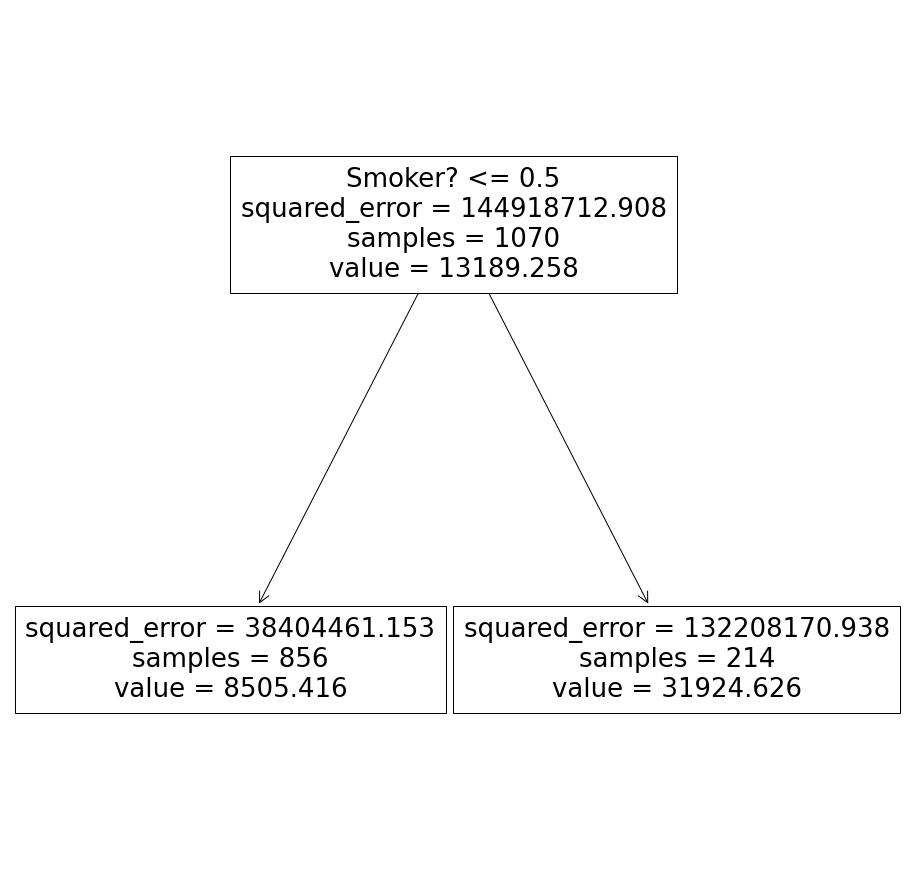

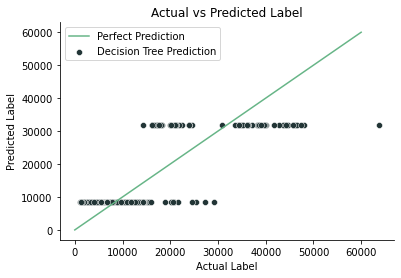

In [8]:
DecisionTreePlot(1)

MSE is 19767909.1423
RMSE is 4446.1117
MAE is 3008.8962
R-squared is 0.8707


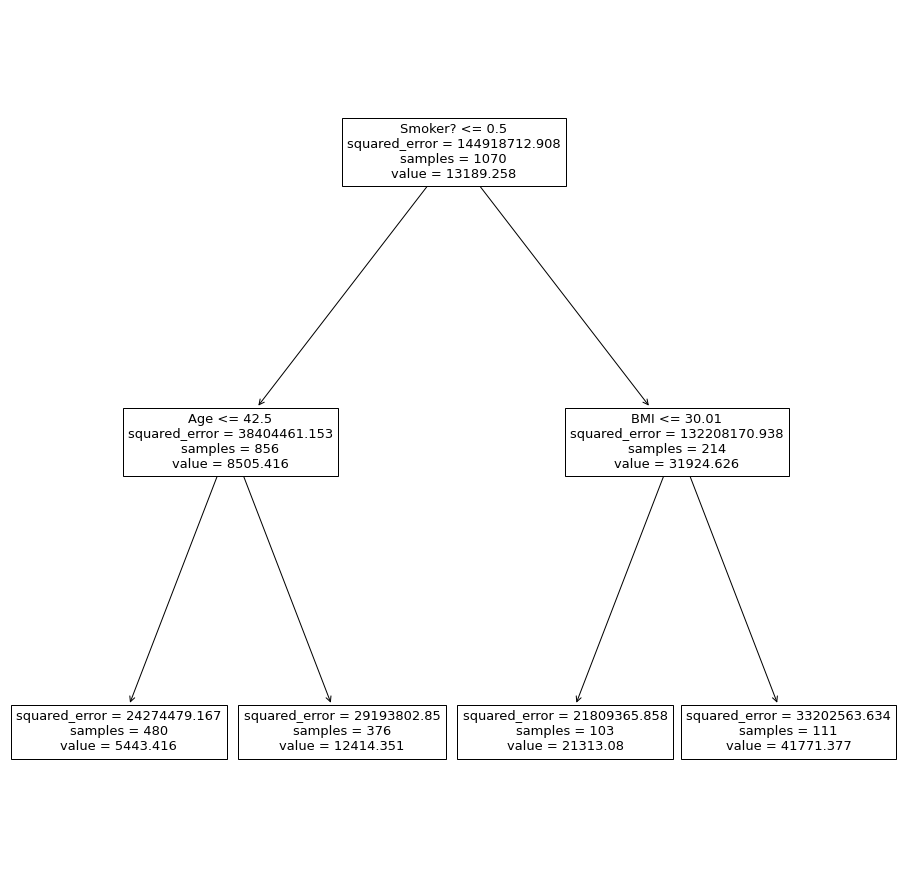

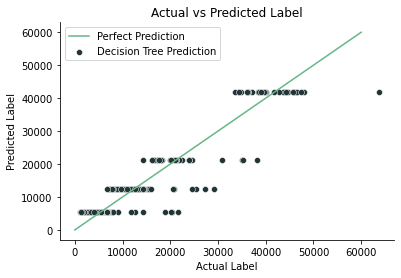

In [9]:
DecisionTreePlot(2)

MSE is 14820332.2924
RMSE is 3849.7185
MAE is 2461.8478
R-squared is 0.9031


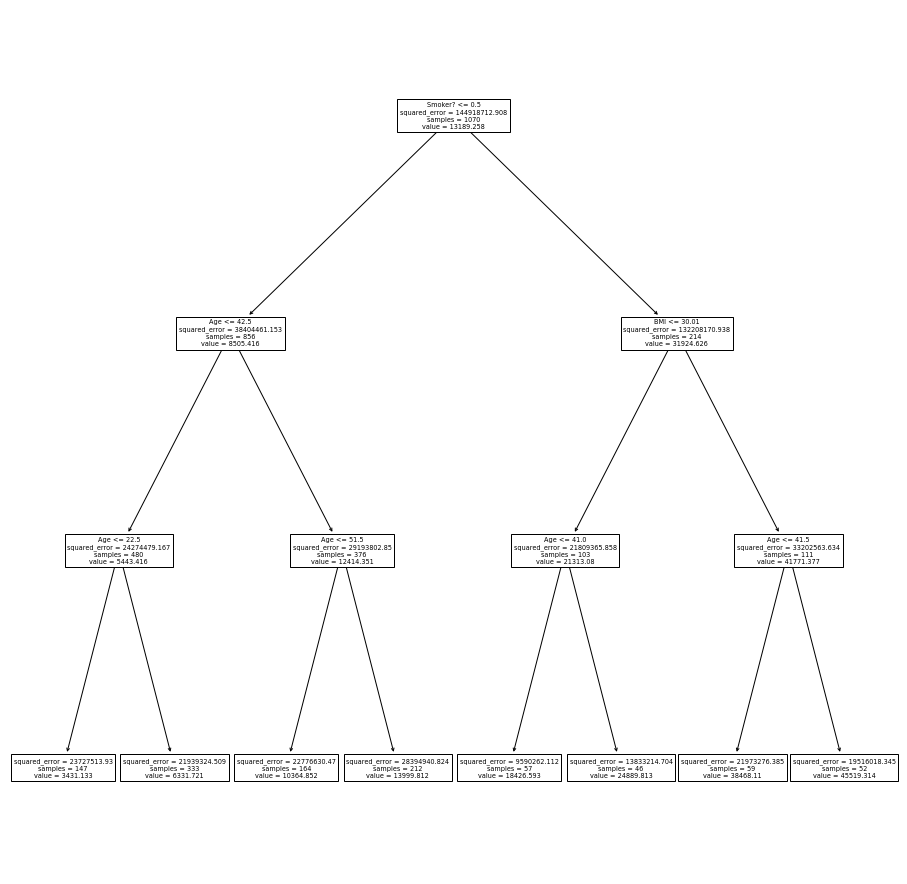

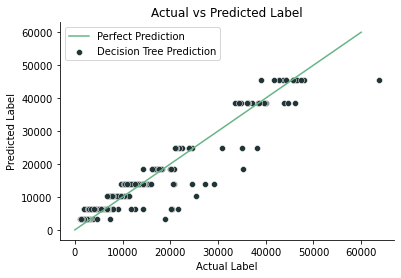

In [10]:
DecisionTreePlot(3)

MSE is 17099331.3644
RMSE is 4135.1338
MAE is 2542.9839
R-squared is 0.8882


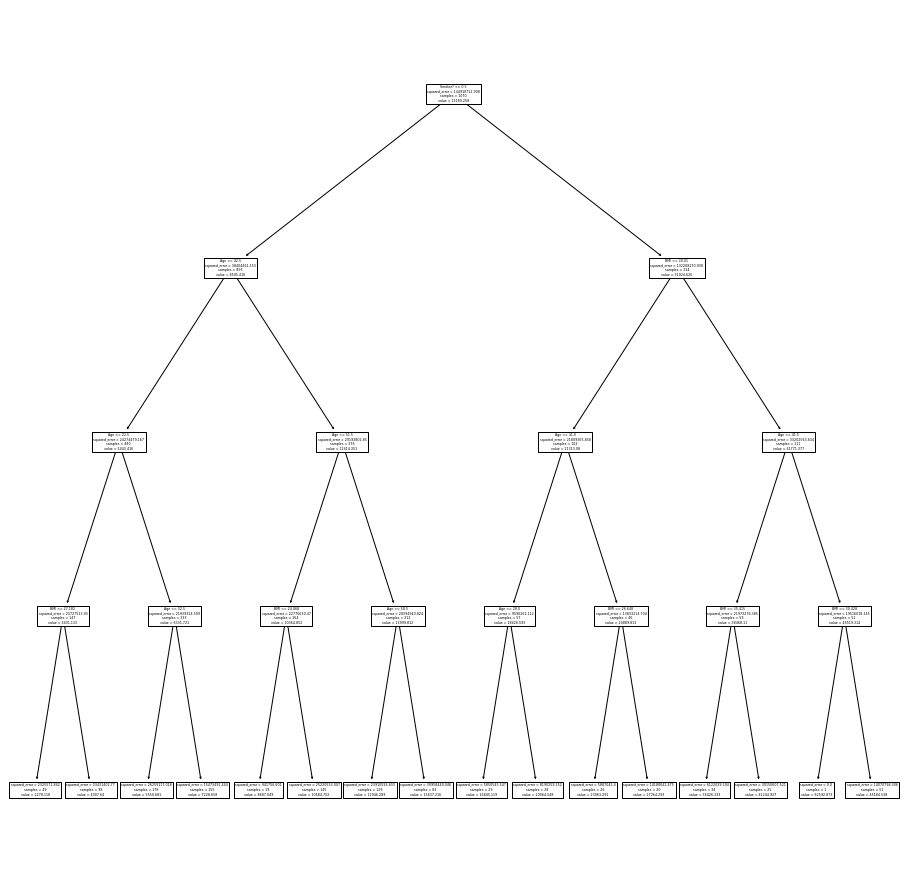

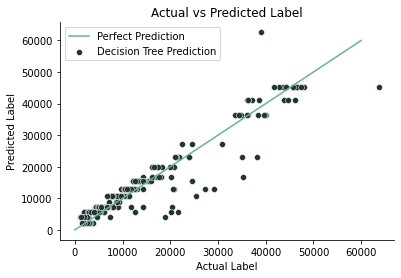

In [11]:
DecisionTreePlot(4)

MSE is 18046660.0894
RMSE is 4248.1361
MAE is 2548.1876
R-squared is 0.8820


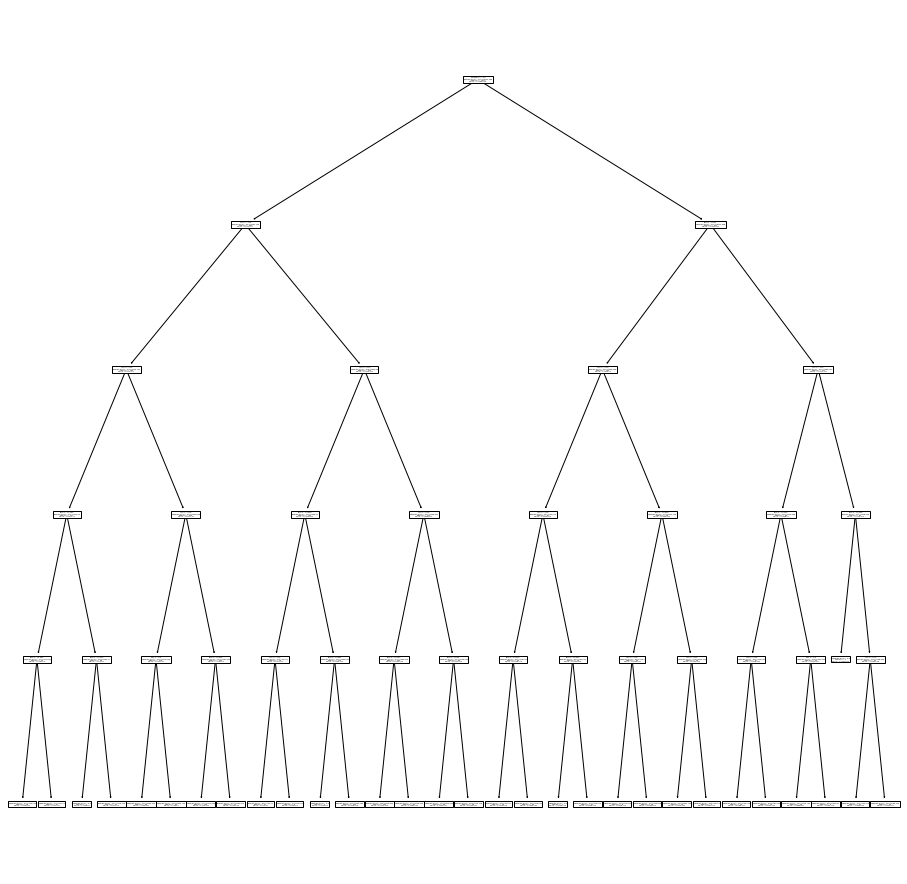

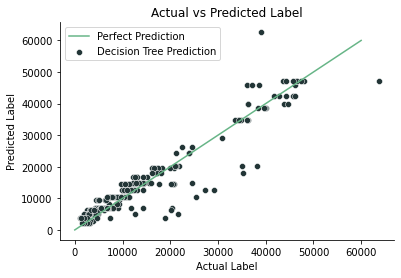

In [12]:
DecisionTreePlot(5)

---
## Condorcet's Jury Theorem:
We can motivate the basic idea behind Model Ensembles using the following concept/theorem:

Suppose you are creating a jury that aims to reach a decision by a **majority vote**:
- There are a binary set of outcomes - *correct* and *incorrect*
- Each voter has an *independent probability $p$* of voting for the *correct* decision
- The question we ask is: <font color=#FF8181>**How many voters should we include in the jury group, so that we maximise the probability of the majority vote being correct?**</font>

This is the formulation of the famous <font color=#14F278>**Condorcet's Jury Theorem**</font> - a political science theorem about the relative probability of a given group of individuals arriving as a correct decision. The answer to the question the theorem poses is as follows:
- It all depends on whether $p$ is greater or less than $\frac{1}{2}$
- If **$p>\frac{1}{2}$** (each voter is more likely to vote correctly), then adding more voters increases the probability of the majority vote being correct
- If **$p<\frac{1}{2}$**, however, then adding more voters makes things worse, since the optimal jury consists of a single voter.

Translating the Condorcet's Jury Theorem to Machine Learning has a powerful implication: If you are using individual models that are *weak* predictors, combining many of them (in some optimal sense) can potentially produce a more powerful model with a higher predictive power.

---
## Parallel Model Ensembles:

### Model Averaging:
- Suppose there are **B independent and identically distributed (iid)** training sets of *equal size*
- We can use them to train **B independent prediction functions**: $\hat{f_{1}},\hat{f_{2}}, ..., \hat{f_{B}}$
- We can then take the **average of these functions**: 

$$
\hat{f_{avg}}(x)=\frac{1}{B}\sum_{i=1}^{B}\hat{f_{i}}(x)
$$

- Note that when we take the average moedl, in theory we don't add any bias, but we can **reduce the error due to variance** (i.e., reduce the chance of Overfitting)
- The problem, however, is that we do not have access to **B** Independent Training Sets. To solve this problem, we look at a technique called **Bootstrapping**

---
### Bootstrapping:

We can emulate the process of generating new datasets by leveraging **Bootstrapping**. Bootstrapping is a resampling approach that can be used to produce multiple datasets for a single initial dataset:

- Suppose we have a dataset **$D$** of size **$N$** and we need to generate **$B$** "bootstrapped" datasets - **$D_{1}, .., D_{B}$** 
- For each **$i$** from 1 to **$B$** we will draw a random set of points from dataset **$D$** <font color=#14F278>**with replacements**</font>  - usually we draw as many as the size of **$D$**:

<center>
    <div>
        <img src="./Images/Bootstrapping.JPG"/>
    </div>
</center>

The outcome of Bootstrapping is **B** datasets that:
- Have been drawn from the *same original dataset*, i.e., come from the sam**Distribution**
- Have been drawn with *replacement*, which ensures **Independence** across the datasets 

---
### Bagging:

**Bagging** stands for <font color=#14F278>**B**</font>ootstrap <font color=#14F278>**Agg**</font>regat<font color=#14F278>**ing**</font>. When the individual models are *Decision Trees*, we can construct a **Bagged Trees Composite Model**, where each individual tree is trained on a bootstrapped dataset:

<center>
    <div>
        <img src="./Images/Bagging.JPG"/>
    </div>
</center>

Bagging is a 'Parallel Ensemble Technique', where base learners are generated in a parallel format. Parallel methods utilise the parallel generation of base learners to encourage independence between the base learners. The independence of base learners significantly reduces the error due to the application of averages.

---
### Random Forest:

A disadvantage to using Bagged Trees is that the individual trees can end us being **highly correlated** and hence undesirable. 

**Random Forests** is like Bagged Trees, except for one modification:
- First, B boostrapped datasets are sampled from the original dataset
- B Decision Trees are trained
- While increasing the depth of each tree, we *randomly select a subset of features at each step of performing the **Recursive Binary Splitting***

The **extra randomisation step** helps to **decorrelate** the trees and thus *reduce* overfitting.


---
## Random Forest with Scikit-Learn:

We can now implement these notions to the `insurance_v2.csv` dataset. The aim is to *predict* the **Medical Insurance Charge**:
- A **Random Forest** is a Parallel Model Ensemble of Decision Trees, which means that it also requires *Minimal Data Pre-processing*:
    - It is insensitive to the scale of numerical features so One-Hot Encoding is NOT required. 
    - We perform **Ordinal Encoding** for categorical data in the form of a string:

A **Random Forest** is implemented via the `sklearn.ensemble` library. Just like CART, Random Forests can be used both for **Regression** and **Classification**, by making use of the `RandomForestRegressor()` or `RandomForestClassifier()` respectively
- In this case, we will use `RandomForestRegressor()` to initialise our model, fit to the training data and test it against the test data

In [13]:
# Load the dataset:
filepath = r'./Data/insurance_v2.csv'
df = pd.read_csv(filepath)
df.columns = ['Age', 'Sex', 'BMI', 'Children', 'Smoker?', 'Region', 'Hospital Charges']


# Basic Ordinal Encoding on the Categorical Data:
df['Smoker?'] = df['Smoker?'].map({'yes':1, 'no':0})
df['Sex'] = df['Sex'].map({'female':1, 'male':0})
df.head()

# Feature Selection:
X = df[['Age', 'Sex', 'Smoker?', 'BMI']]
y = df['Hospital Charges']

# Train-Test Split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# Initialise Random Forest Regressor Model:
RandomForestModel = RandomForestRegressor()

# 5) Fit and Predict:
RandomForestModel.fit(X_train, y_train)
y_pred = RandomForestModel.predict(X_test)

# Evaluate and print the model performance metrics:
MAE_RandomForestModel = mean_absolute_error(y_test, y_pred)
MSE_RandomForestModel = mean_squared_error(y_test, y_pred)
R2SCORE_RandomForestModel = r2_score(y_test, y_pred)

print(f'MSE is {MSE_RandomForestModel:.4f}')
print(f'RMSE is {MSE_RandomForestModel**0.5:.4f}')
print(f'MAE is {MAE_RandomForestModel:.4f}')
print(f'R-squared is {R2SCORE_RandomForestModel:.4f}')

MSE is 19859253.9677
RMSE is 4456.3723
MAE is 2606.3028
R-squared is 0.8701


---
### Random Forest - Hyperparameter Tuning:

Just like Decision Trees, Random Forests also characterise with a set of *Hyperparameters*, which control the process of growing the forest and its complexity:
<center>
    <div>
        <img src="./Images/Random_Forest_Hyperparameters.JPG"/>
    </div>
</center>

- We set the hyperparameter values upfront and at the stage of initialising the model
- Alternatively, we can tune Hyperparameters via **Grid Search CV** (or via Randomised Search CV for more computationally-heavy experiments):


In [15]:
# Initialise Random Forest Regressor Model:
RandomForestModel2 = RandomForestRegressor()

# Perform Grid Search CV - pass ranges for the Hyperparameters:
parameters = {'max_depth':        [2,3,4,5,6,7,8],
              'min_samples_leaf': [10, 20,30, 50],
              'n_estimators':[50,100,150,200]}  

GridSearchOpt2 = GridSearchCV(estimator = RandomForestModel2, param_grid = parameters, cv=5)

# Fit and Predict:
GridSearchOpt2.fit(X_train, y_train)
y_pred = GridSearchOpt2.predict(X_test)

# Evaluate and Print the Model Performance metrics:
MAE_RandomForestModel2 = mean_absolute_error(y_test, y_pred)
MSE_RandomForestModel2 = mean_squared_error(y_test, y_pred)
R2SCORE_RandomForestModel2 = r2_score(y_test, y_pred)

print(f'MSE is {MSE_RandomForestModel2:.4f}')
print(f'RMSE is {MSE_RandomForestModel2**0.5:.4f}')
print(f'MAE is {MAE_RandomForestModel2:.4f}')
print(f'R-squared is {R2SCORE_RandomForestModel2:.4f}')


# Retrieve the Optimal hyperparamer values, found by Grid Search CV:
best_depth = GridSearchOpt2.best_estimator_.max_depth
best_min_samples = GridSearchOpt2.best_estimator_.min_samples_leaf
best_n_estimators = GridSearchOpt2.best_estimator_.n_estimators
print(f'Best estimator: Depth of: {best_depth}, Best Number of Trees: {best_n_estimators}, and Minimum Number of Samples: {best_min_samples}')

MSE is 14361146.6378
RMSE is 3789.6104
MAE is 2291.8388
R-squared is 0.9061
Best estimator: Depth of: 4, Best Nummber of Trees: 200, and Minimum Number of Samples: 10


---
### Random Forest - Extra Points:
- Random Forests are *not* very interpretable, unlike Decision Trees (where you can plot the tree and see the binary conditions, used for each split) or Linear Models (where you can explore and interpret the coefficient values)
- However, Random Forests are *excellent 'out of the box' models* meaning that they generally work well without a lot of hyperparameter tuning
- There is another extension of Random Forests in `sklearn` called **`ExtraTrees`** or **`Extremely Randomized Trees`**, which further reduce variance at a cost of a moderate increase in bias.

---
## Series Model Ensembles:

### Additive Modelling:

**Additive Modelling** is the process of adding a number of simple functions to create a complex function:

$$
F_{M}(x) = f_{1}(x) + f_{2}(x) + \dots + f_{M}(x) = \Sigma_{m=1}^{M}f_{m}(x)
$$

<center>
    <div>
        <img src="./Images/Additive_Modelling.JPG"/>
    </div>
</center>

---
### Boosting:

**Boosting** algorithms use Additive Modelling to gradually nudge a weak learner to create a strong model:
- This type of modelling is known as **Forward Stagewise Additive Modelling** and is done by improving on the mistakes of the model in the previous step
- In that sense, Boosting Ensembles are Series Model Ensembles as they consist of a sequence of base models, where on each new stage, the model builds on (and improves) on the previous model

There are several Boosting algorithms, the two most popular of which:
- **Adaboost - Adaptive Boosting**
- **Gradient Boosting**

---
### Gradient Boosting:
**Gradient Boosting** is one of the most popular Boosting algorithms and perhaps the most powerful one for analysing tabular data. The main feature of Gradient Boosting is the **target labels**, on which each weak learner is trained on at any given stage:
    - At the first stage, a weak learner is trained on the initial training data
    - It then produces predictions for the label, **compared to the actual labels** in the training data
    - The **prediction errors** are then taken and in turn, *become the labels* for the *second weak learner*
- A way of visualising Gradient Boosting is with the following **Golfer Analogy**:
<center>
    <div>
        <img src="./Images/Gradient_Boosting_Analogy.JPG"/>
    </div>
</center>

In practice, we use a ***learning rate*** to control how much each individual stage prediction adds to the model.

---
### XGBoost:
- **XGBoost** is the most popular implementation of Gradient Boosting, available in Python via the `xgboost` library
- Depending on the task, we can import classes such as `XGBRegressor()` or `XGBClassifier()` and proceed with the standard steps of a ML workflow
- Below are some of important Hyperparametersfor Gradient Boosting that can be tuned if required:
<center>
    <div>
        <img src="./Images/Gradient_Boosting_Hyperparameters.JPG"/>
    </div>
</center>

We can show an example of the `XGBoost` algorithm in action by applying the technique to the `insurance_v2.csv` dataset that we have from before:

In [16]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

# Initialise an XGBRegressor() model, passing some hyperparameter values
XGBoostModel = xgb.XGBRegressor(learning_rate = 0.03, max_depth = 4, n_estimators = 150)

# Fit/Predict
XGBoostModel.fit(X_train, y_train)
y_pred = XGBoostModel.predict(X_test)


# Performance Evaluation
MSE_XGBoostModel = mean_squared_error(y_test, y_pred)
MAE_XGBoostModel = mean_absolute_error(y_test,y_pred)
R2SCORE_XGBoostModel = r2_score(y_test, y_pred)

print(f'MSE (test): {MSE_XGBoostModel:.4f}')
print(f'RMSE (test): {MSE_XGBoostModel**0.5:.4f}')
print(f'MAE (test): {MAE_XGBoostModel:.4f}')
print(f'R-squared is: {R2SCORE_XGBoostModel}')

MSE (test): 14294271.8387
RMSE (test): 3780.7766
MAE (test): 2249.6863
R-squared is: 0.9065095622414033
